# <span style="color:darkslategray">ABC LLC - Leads for Health Insurance Services </span>

### <span style="color:dimgray">Importing packages</span>

In [41]:
# Importing general packages
import pandas as pd
import dfply

from dfply import *
import numpy as np

# Importing packages for vizualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

# Importing packages for encoding and standardization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing packages for custering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

### <span style="color:dimgray">Loading data</span>

<b>Features of df_bids:</b><br/>
● created: time of the bid<br />
● leadID: unique ID of lead<br />
● max_bid: bid offered by Abc LLC for that particular lead<br />
● won: 1 if their bid was the highest and they won the bid, 0 otherwise

In [2]:
# Reading Bids csv file
df_bids = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/bids_hw.csv', index_col=0)
df_bids.head(5)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,created,leadID,max_bid,won
1,2017-12-22 16:08:21,4,22.0,1
2,2018-01-18 16:18:19,30,4.0,1
3,2018-01-22 16:08:57,120,5.0,1
4,2018-01-23 17:28:09,258,5.0,1
5,2018-01-23 18:16:10,266,6.0,1


<b>Features of df_leads:</b><br />
● leadID: unique ID of the lead<br />
● state_18: the state where the lead lives in<br />
● gender_18: lead's gender, which is 1 if male, and 2 if female<br />
● estimated_household_income_18: this is the lead's estimation of their own household income per year in dollars <br />
● cpa_status_18: 1 for closed leads, 0 for lost leads<br />
● premium_amount_18: value of the contract signed, to be paid monthly in dollars<br />

In [3]:
# Reading Leads csv file
df_leads = pd.read_csv('C:/Users/ZsoltNagy/Desktop/github_projects/ABC_LLC_Leads_Boberdoo/ABC_LLC_Leads/Data/leads_hw.csv', index_col=0)
df_leads.head(5)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18
1,4,IL,1,37.00,45000,1.0,700
2,30,NY,2,43.35,65000,0.0,0
3,120,NY,1,32.96,90000,0.0,0
4,258,NY,1,34.82,65000,0.0,0
5,266,NY,2,40.35,65000,0.0,0


### <span style="color:dimgray"> Merging dataset </span>

In [4]:
# Joining the two dataframe
df = df_leads >> left_join(df_bids, by = "leadID")
df.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1
1,30,NY,2,43.35,65000,0.0,0,2018-01-18 16:18:19,4.0,1
2,120,NY,1,32.96,90000,0.0,0,2018-01-22 16:08:57,5.0,1
3,258,NY,1,34.82,65000,0.0,0,2018-01-23 17:28:09,5.0,1
4,266,NY,2,40.35,65000,0.0,0,2018-01-23 18:16:10,6.0,1
5,348,NY,1,36.00,35000,0.0,0,2018-01-23 22:29:37,4.0,1
6,354,NY,1,36.69,35000,0.0,0,2018-01-23 22:30:47,4.0,1
7,360,MA,2,55.02,35000,0.0,0,2018-01-23 22:39:53,4.0,1
8,370,MA,1,57.89,90000,0.0,0,2018-01-23 22:44:28,4.0,1
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1


### <span style="color:dimgray"> Exploring the dataset </span>

In [5]:
# Checking the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360295 entries, 0 to 1360294
Data columns (total 10 columns):
leadID                           1360295 non-null int64
state_18                         1360295 non-null object
gender_18                        1360295 non-null int64
age_18                           1360295 non-null float64
estimated_household_income_18    1360295 non-null int64
cpa_status_18                    18788 non-null float64
premium_amount_18                1360295 non-null int64
created                          1360295 non-null object
max_bid                          1360295 non-null float64
won                              1360295 non-null int64
dtypes: float64(3), int64(5), object(2)
memory usage: 114.2+ MB


In [6]:
# Describing continuous variables
df.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,1.360295e+06,1.360295e+06,1.360295e+06,1.360295e+06,18788.000000,1.360295e+06,1.360295e+06,1.360295e+06
mean,7.436914e+06,1.497919e+00,4.566375e+01,6.066725e+04,0.026613,4.736417e+03,4.211519e+00,1.983687e-02
std,1.477931e+06,4.999959e-01,1.101899e+01,7.513724e+04,0.160953,5.523757e+06,1.824614e+00,1.394395e-01
min,4.000000e+00,1.000000e+00,1.000000e-01,2.000000e+04,0.000000,0.000000e+00,5.000000e-01,0.000000e+00
25%,6.412174e+06,1.000000e+00,3.600000e+01,4.000000e+04,0.000000,0.000000e+00,3.200000e+00,0.000000e+00
50%,7.475701e+06,1.000000e+00,4.600000e+01,5.000000e+04,0.000000,0.000000e+00,4.000000e+00,0.000000e+00
75%,8.578158e+06,2.000000e+00,5.500000e+01,6.500000e+04,0.000000,0.000000e+00,5.000000e+00,0.000000e+00
max,1.000259e+07,2.000000e+00,1.159400e+02,1.000000e+06,1.000000,6.442451e+09,3.000000e+01,1.000000e+00


In [7]:
#Missing values computation
df.isnull().sum()

leadID                                 0
state_18                               0
gender_18                              0
age_18                                 0
estimated_household_income_18          0
cpa_status_18                    1341507
premium_amount_18                      0
created                                0
max_bid                                0
won                                    0
dtype: int64

#### <span style="color:steelblue"> Univariate analysis on closed leads </span>

In [8]:
df_closed = df >> mask(X.cpa_status_18 == 1)

In [9]:
df_closed.dtypes

leadID                             int64
state_18                          object
gender_18                          int64
age_18                           float64
estimated_household_income_18      int64
cpa_status_18                    float64
premium_amount_18                  int64
created                           object
max_bid                          float64
won                                int64
dtype: object

In [10]:
df_closed.describe()

,leadID,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,max_bid,won
count,5.000000e+02,500.000000,500.000000,500.000000,500.0,5.000000e+02,500.000000,500.0
mean,1.972253e+06,1.458000,44.640020,60412.302000,1.0,1.288585e+07,10.286160,1.0
std,2.439044e+06,0.498732,12.468135,45353.694216,0.0,2.881151e+08,4.792513,0.0
min,4.000000e+00,1.000000,22.820000,20000.000000,1.0,0.000000e+00,1.500000,1.0
25%,2.735450e+05,1.000000,32.245000,40000.000000,1.0,5.022500e+02,6.500000,1.0
50%,1.291555e+06,1.000000,46.120000,48000.000000,1.0,8.410000e+02,10.000000,1.0
75%,2.169809e+06,2.000000,56.460000,65500.000000,1.0,1.311750e+03,12.500000,1.0
max,9.956599e+06,2.000000,64.220000,750000.000000,1.0,6.442451e+09,28.000000,1.0


Text(0.5, 1.0, 'Distribution of Gender')

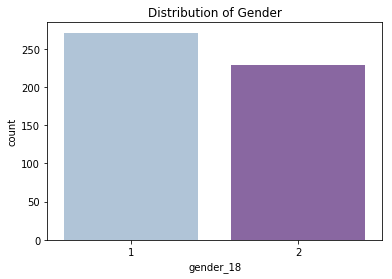

In [11]:
# Distribution of gender 
sns.countplot(x='gender_18', data=df_closed, palette="BuPu")
plt.title('Distribution of Gender')

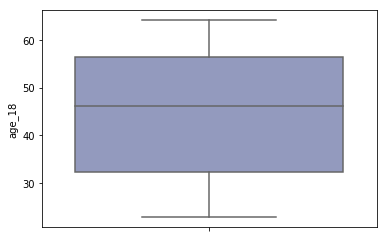

In [12]:
sns.boxplot(x="age_18", data=df_closed, orient="v", palette="BuPu")

Text(0.5, 0, 'Age')

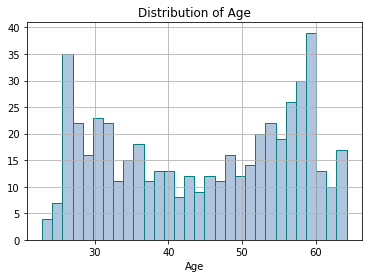

In [13]:
# Distribution of ages

df_closed.hist('age_18', bins=30, color = "lightsteelblue", ec="teal")
plt.title('Distribution of Age')
plt.xlabel('Age')

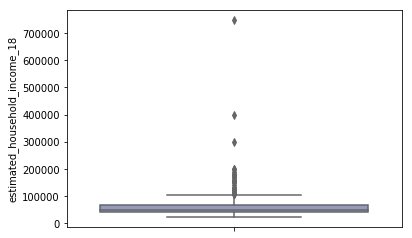

In [14]:
sns.boxplot(x="estimated_household_income_18", data=df_closed, orient="v", palette="BuPu")

In [15]:
#Excluding the outlier cases 

def outliers_iqr(x, mplyr):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * mplyr)
    upper_bound = quartile_3 + (iqr * mplyr)
    return np.where((x > upper_bound) | (x < lower_bound))
indexes_to_drop = list(outliers_iqr(df_closed['estimated_household_income_18'], 3.5))

df_closed = df_closed.drop(df_closed.index[indexes_to_drop])


C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Text(0.5, 0, 'HH Income')

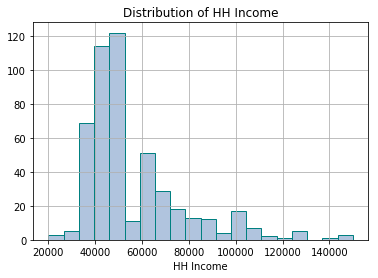

In [16]:
df_closed.hist('estimated_household_income_18', bins=20, color = "lightsteelblue", ec="teal")
plt.title('Distribution of HH Income')
plt.xlabel('HH Income')

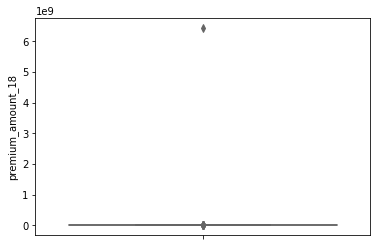

In [17]:
sns.boxplot(x="premium_amount_18", data=df_closed, orient="v", palette="BuPu")

In [18]:
#Excluding the outlier case 
df_closed = df_closed >> mask(X.premium_amount_18 < max(df_closed['premium_amount_18'])) 

Text(0.5, 0, 'Contract Value')

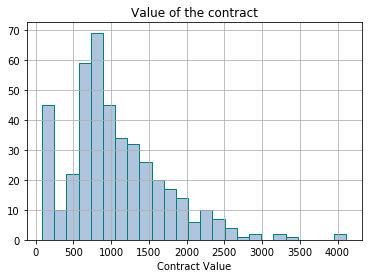

In [19]:
df_closed = df_closed >> mask(X.premium_amount_18 > 0) 

df_closed.hist(column='premium_amount_18', bins=25, color = "lightsteelblue", ec="teal")
plt.title('Value of the contract')
plt.xlabel('Contract Value')


<Figure size 1152x1152 with 0 Axes>

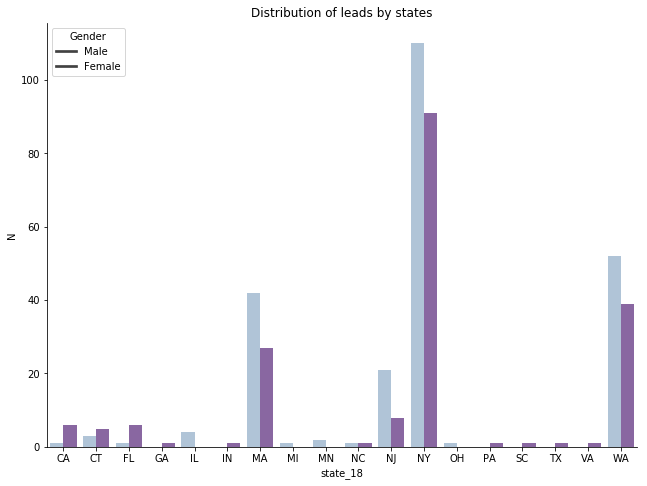

In [20]:
# Distribution of closed leads by states 
df_state = df_closed >> group_by(X.state_18, X.gender_18) >> summarize(N=n(X.leadID))


plt.figure(figsize=(16, 16))
g = sns.catplot(x='state_18', y='N', hue='gender_18', data=df_state, palette="BuPu", kind='bar', legend=False)
plt.title('Distribution of leads by states')
plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
g.fig.set_figwidth(10)
g.fig.set_figheight(7)

### <span style="color:dimgray"> Abc LLC's current most typical client </span>

In [21]:
# Creating new categorical age variable
#bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 44), (45, 64), (65, 150)])
bins=[0, 18, 45, 65, np.inf]
df_closed['Age_c'] = pd.cut(round(df_closed['age_18'], 0), bins=bins, labels=['Under_18', '18-44', '45-64', '65_and_Above'])

In [22]:
# Checking classes of age
df_closed >> group_by(X.Age_c) >> summarize(N=n(X.leadID), Min=X.age_18.min(), Max=X.age_18.max())

,Age_c,N,Min,Max
0,Under_18,0,NaN,NaN
1,18-44,210,22.82,45.23
2,45-64,218,45.65,64.22
3,65_and_Above,0,NaN,NaN


In [23]:
# Creating new categorical income variable
df_closed['Income_c'] = pd.cut(df_closed['estimated_household_income_18'], bins=4, labels=['Lowest', 'Lower_middle', 'Upper_middle', 'Highest'])

In [24]:
# Checking classes of income
df_closed >> group_by(X.Income_c) >> summarize(N=n(X.leadID), Min=X.estimated_household_income_18.min(), Max=X.estimated_household_income_18.max())

,Income_c,N,Min,Max
0,Lowest,269,20000,52000
1,Lower_middle,114,55000,85000
2,Upper_middle,37,85800,115000
3,Highest,8,120000,150000


In [25]:
#Finding the 5 most typical customer groups
df_typ_cust = df_closed >> group_by(X.state_18, X.gender_18, X.Age_c, X.Income_c) >> summarize(N = n(X.leadID), Avg_Contr_Size = X.premium_amount_18.mean())
df_typ_cust.sort_values(by='N', ascending=False).head(5)

,Income_c,Age_c,gender_18,state_18,N,Avg_Contr_Size
50,Lowest,18-44,1,NY,44,743.772727
58,Lowest,18-44,2,NY,30,711.533333
54,Lowest,45-64,1,NY,28,999.750000
62,Lowest,45-64,2,NY,25,1205.000000
71,Lowest,18-44,1,WA,17,756.000000


#### <span style="color:darkred"> Question 1: Analysis on most typical client </span>

#### <span style="color:sienna"> <i> The typical client of ABC LLC is a young adult male who lives in New York, whose household income belongs to the lowest segment of the sample and average contract size is around 740 dollars. </i></span>

### <span style="color:dimgray"> Customer segmentation using K-means and hierarchical clustering </span>

#### <span style="color:steelblue"> Customer segmentation on closed leads </span>

In [26]:
# One-hot-encoding categorical variables

# Selecting relevant features
df_closed_enc = df_closed >> select(X.leadID, 
                                    X.gender_18, 
                                    X.age_18, 
                                    X.estimated_household_income_18, 
                                    X.premium_amount_18, 
                                    X.state_18)

cat_columns = ["gender_18", "state_18"]
df_closed_enc = pd.get_dummies(df_closed_enc, 
                               prefix_sep="__",
                               columns=cat_columns)

df_closed_enc.head(10)

,leadID,age_18,estimated_household_income_18,premium_amount_18,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,4,37.00,45000,700,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,382,34.89,76000,554,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
44,874,35.86,40000,916,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,946,46.94,35000,777,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,1218,52.92,47000,840,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,1368,56.46,55000,1118,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
113,1728,30.06,35000,1254,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
123,1856,35.79,35000,740,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,2028,45.65,35000,1107,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
198,2208,53.22,46000,1117,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Standardizing data to ensure that unit of dimension does not distort relative near-ness of observations

# Using MinMaxScale considering the presence of high number of binnary features: 
df_columns = ['age_18', 'estimated_household_income_18', 'premium_amount_18']
mms = MinMaxScaler()
df_closed_st_mm = mms.fit_transform(df_closed_enc[['age_18', 'estimated_household_income_18', 'premium_amount_18']])
df_closed_st_mm = pd.DataFrame(df_closed_st_mm, columns=df_columns)
df_closed_st_mm['leadID'] = list(df_closed_enc['leadID'])
df_closed_st_mm = df_closed_st_mm >> left_join(df_closed_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y', 'premium_amount_18_y'])
df_closed_st_mm.head(10)

C:\Users\ZsoltNagy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age_18_x,estimated_household_income_18_x,premium_amount_18_x,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,state_18__IL,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,0.342512,0.192308,0.152912,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.291546,0.430769,0.116729,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.314976,0.153846,0.206444,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.582609,0.115385,0.171995,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.727053,0.207692,0.187608,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.812560,0.269231,0.256506,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0.174879,0.115385,0.290211,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0.313285,0.115385,0.162825,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.551449,0.115385,0.253779,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.734300,0.200000,0.256258,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


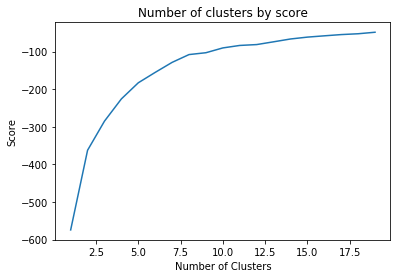

In [28]:
# Determining the number of clusters for K-means
clusters_range = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in clusters_range]
score = [kmeans[i].fit(df_closed_st_mm).score(df_closed_st_mm) for i in range(len(kmeans))]

plt.plot(clusters_range,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Number of clusters by score')
plt.show()

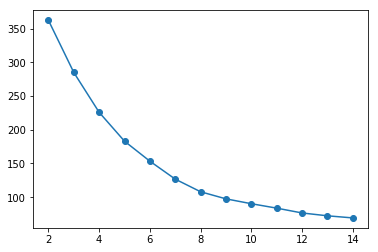

In [29]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[] 
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_closed_st_mm)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [30]:
# Running K-means cluster on the encoded dataframe with 4 clusters based on elbow method
kmens = KMeans(n_clusters=4, random_state=0).fit(df_closed_st_mm)
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters_mm'] = kmens.labels_
df_closed.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters_mm
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Lowest,3
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Lower_middle,0
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Lowest,2
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Lowest,3
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Lowest,3
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Lower_middle,0
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Lowest,1
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Lowest,3
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Lowest,1
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Lowest,2


In [33]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_mm = df_closed >> group_by(X.Clusters_mm) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters_mm) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_mm', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_mm', columns='state_18', values='State_N')
cluster_df_mm['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_mm.loc[rows, 'Most_Freq_States'] = string
cluster_df_mm

,Clusters_mm,Gender_dist,Avg_Age,Avg_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,2.0,44.167143,55582.659341,1092.472527,9.452747,4.809073,91,"NY, CA, CT, FL, GA"
1,1,1.0,42.362455,56101.827273,977.263636,8.594545,3.963708,110,"NY, CA, CT, FL, GA"
2,2,2.0,45.574592,54080.387755,1036.132653,10.905102,4.275545,98,"WA, MA, NJ, FL, CA"
3,3,1.0,45.245271,56877.906977,1126.651163,11.664341,5.287467,129,"WA, MA, NJ, IL, CT"


In [34]:
# Standardizing data to ensure that unit of dimension does not distort relative near-ness of observations

# Using RobustScaler considering the presence of possible outliers: 
df_columns = ['age_18', 'estimated_household_income_18', 'premium_amount_18']
rsc = RobustScaler()
df_closed_st_rc = rsc.fit_transform(df_closed_enc[['age_18', 'estimated_household_income_18', 'premium_amount_18']])
df_closed_st_rc = pd.DataFrame(df_closed_st_rc, columns=df_columns)
df_closed_st_rc['leadID'] = list(df_closed_enc['leadID'])
df_closed_st_rc = df_closed_st_rc >> left_join(df_closed_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y', 'premium_amount_18_y'])
df_closed_st_rc.head(10)

,age_18_x,estimated_household_income_18_x,premium_amount_18_x,gender_18__1,gender_18__2,state_18__CA,state_18__CT,state_18__FL,state_18__GA,state_18__IL,...,state_18__MN,state_18__NC,state_18__NJ,state_18__NY,state_18__OH,state_18__PA,state_18__SC,state_18__TX,state_18__VA,state_18__WA
0,-0.367743,-0.12,-0.282237,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-0.454007,1.12,-0.474342,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.414350,-0.32,0.001974,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.038635,-0.52,-0.180921,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.283115,-0.04,-0.098026,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.427841,0.28,0.267763,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,-0.651472,-0.52,0.446711,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,-0.417212,-0.52,-0.229605,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.014105,-0.52,0.253289,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0.295380,-0.08,0.266447,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


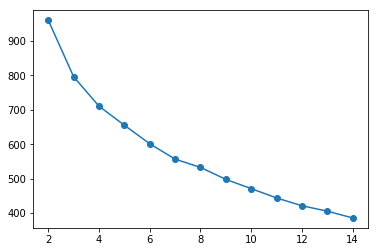

In [35]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[] 
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_closed_st_rc)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [36]:
# Running K-means cluster on the encoded dataframe with 4 clusters based on elbow method
kmens = KMeans(n_clusters=4, random_state=0).fit(df_closed_st_rc)
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters_rc'] = kmens.labels_
df_closed.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters_mm,Clusters_rc
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Lowest,3,2
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Lower_middle,0,3
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Lowest,2,3
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Lowest,3,2
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Lowest,3,2
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Lower_middle,0,3
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Lowest,1,2
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Lowest,3,2
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Lowest,1,2
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Lowest,2,3


In [37]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_rc = df_closed >> group_by(X.Clusters_rc) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters_rc) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_rc', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_rc', columns='state_18', values='State_N')
cluster_df_rc['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_rc.loc[rows, 'Most_Freq_States'] = string
cluster_df_rc



,Clusters_rc,Gender_dist,Avg_Age,Avg_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,1.347826,53.600725,62791.362319,2098.956522,10.539130,5.389456,69,"NY, WA, MA, NJ, FL"
1,1,1.333333,46.303333,99946.294118,1200.862745,11.631373,4.944714,51,"NY, WA, MA, NJ, CT"
2,2,1.000000,40.683187,45848.262500,754.218750,9.615000,4.398387,160,"NY, WA, MA, NJ, IL"
3,3,2.000000,43.329730,47978.135135,858.418919,10.271622,4.783589,148,"NY, WA, MA, NJ, CT"


In [38]:
print(cluster_df_mm)
print(cluster_df_rc)

   Clusters_mm  Gender_dist    Avg_Age       Avg_Inc  Avg_Contr_size  \
0            0          2.0  44.167143  55582.659341     1092.472527   
1            1          1.0  42.362455  56101.827273      977.263636   
2            2          2.0  45.574592  54080.387755     1036.132653   
3            3          1.0  45.245271  56877.906977     1126.651163   

   Avg_MBids  SD_MBids    N    Most_Freq_States  
0   9.452747  4.809073   91  NY, CA, CT, FL, GA  
1   8.594545  3.963708  110  NY, CA, CT, FL, GA  
2  10.905102  4.275545   98  WA, MA, NJ, FL, CA  
3  11.664341  5.287467  129  WA, MA, NJ, IL, CT  
   Clusters_rc  Gender_dist    Avg_Age       Avg_Inc  Avg_Contr_size  \
0            0     1.347826  53.600725  62791.362319     2098.956522   
1            1     1.333333  46.303333  99946.294118     1200.862745   
2            2     1.000000  40.683187  45848.262500      754.218750   
3            3     2.000000  43.329730  47978.135135      858.418919   

   Avg_MBids  SD_MBids    N 

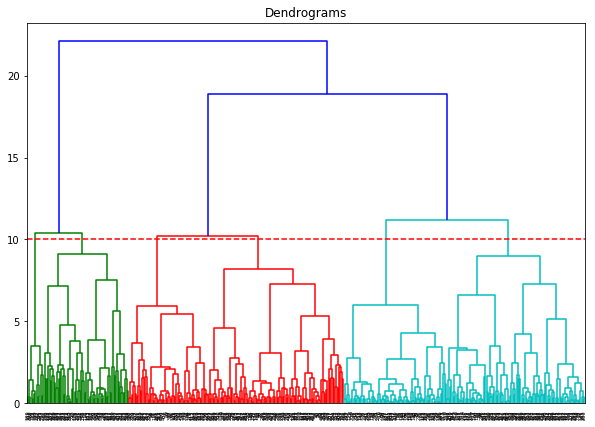

In [54]:
# Applying hierarchical clustering
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_closed_st_rc, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [55]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
# Adding cluster variable to closed lead dataframe 
df_closed['Clusters_hc'] = cluster.fit_predict(df_closed_st_rc)
df_closed.head(10)

,leadID,state_18,gender_18,age_18,estimated_household_income_18,cpa_status_18,premium_amount_18,created,max_bid,won,Age_c,Income_c,Clusters_mm,Clusters_rc,Clusters_hc
0,4,IL,1,37.00,45000,1.0,700,2017-12-22 16:08:21,22.0,1,18-44,Lowest,3,2,3
9,382,NY,2,34.89,76000,1.0,554,2018-01-23 22:49:55,3.0,1,18-44,Lower_middle,0,3,5
44,874,MA,2,35.86,40000,1.0,916,2018-01-24 15:12:14,5.5,1,18-44,Lowest,2,3,2
55,946,MA,1,46.94,35000,1.0,777,2018-01-24 16:59:42,4.0,1,45-64,Lowest,3,2,1
79,1218,MA,1,52.92,47000,1.0,840,2018-01-24 21:26:56,6.0,1,45-64,Lowest,3,2,1
92,1368,NY,2,56.46,55000,1.0,1118,2018-01-24 23:58:42,3.8,1,45-64,Lower_middle,0,3,5
113,1728,NY,1,30.06,35000,1.0,1254,2018-01-25 15:54:08,7.5,1,18-44,Lowest,1,2,3
123,1856,MA,1,35.79,35000,1.0,740,2018-01-25 17:54:41,8.0,1,18-44,Lowest,3,2,1
154,2028,NY,1,45.65,35000,1.0,1107,2018-01-25 20:50:29,6.0,1,45-64,Lowest,1,2,3
198,2208,WA,2,53.22,46000,1.0,1117,2018-01-25 23:32:58,6.0,1,45-64,Lowest,2,3,2


In [56]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_hc = df_closed >> group_by(X.Clusters_hc) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states existing customers are coming from 
df_freq_state = df_closed >> group_by(X.state_18, X.Clusters_hc) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters_hc', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters_hc', columns='state_18', values='State_N')
cluster_df_rc['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_hc.loc[rows, 'Most_Freq_States'] = string
cluster_df_hc


,Clusters_hc,Gender_dist,Avg_Age,Avg_Inc,Avg_Contr_size,Avg_MBids,SD_MBids,N,Most_Freq_States
0,0,1.369231,51.629538,86991.369231,1965.553846,11.227692,5.416079,65,"NY, MA, WA, NJ, CT"
1,1,1.000000,43.868585,50223.311321,928.584906,11.036792,4.926204,106,"WA, MA, NJ, NC, MN"
2,2,2.000000,40.113269,45849.442308,746.548077,10.203846,4.404762,104,"WA, NY, MA, NJ, CT"
3,3,1.000000,40.790886,43416.974684,815.822785,8.669620,3.794745,79,"NY, IL, OH, CA, CT"
4,4,1.000000,38.618462,98000.000000,424.923077,9.576923,3.724056,13,"NY, WA, NJ, CA, CT"
5,5,2.000000,50.487541,55999.311475,1311.262295,9.978689,5.409748,61,"NY, FL, CA, SC, GA"


#### <span style="color:darkred"> Question 2: Analysis on customer segments that Abc LLC should target to maximize their income? </span>

#### <span style="color:sienna"> <i> Description of clusters of current customers:</i></span>
-> <b>Cluster 1:</b> Mixed men and women (with more men), older adults, with HH income close to lower middle, having average contract size the highest<br/>
-> <b>Cluster 2:</b> Mixed men and women (with slightly more men), middle aged, from upper middle income group, having contract size in the fourth quartile <br/>
-> <b>Cluster 3:</b> Exclusively men, youngest average age, from low income HH, having contract size in the first quartile <br/>
-> <b>Cluster 4:</b> Exclusively women, middle aged, from low income HH, having contract size around the median  <br/>  

#### <span style="color:steelblue"> Customer segmentation on lost leads </span>

In [ ]:
# Creating dataframe for lost leads
df_lost = df >> mask(X.cpa_status_18 == 0)
print(len(df_lost))

In [ ]:
# Checking dataframe
df_lost.describe()

In [ ]:
# Checking HH income for detecting outliers
sns.boxplot(x="estimated_household_income_18", data=df_lost, orient="v", palette="BuPu")

In [ ]:
indexes_to_drop = list(outliers_iqr(df_lost['estimated_household_income_18'], 3.5))

df_lost = df_lost.drop(df_lost.index[indexes_to_drop])

In [ ]:
df_lost.hist('estimated_household_income_18', bins=30, color = "lightsteelblue", ec="teal")
plt.title('Distribution of HH Income', fontsize=14)
plt.suptitle('Lost deals')
plt.xlabel('HH Income')

In [ ]:
# One-hot-encoding categorical variables

# Selecting relevant features
df_lost_enc = df_lost >> select(X.leadID, 
                                    X.gender_18, 
                                    X.age_18, 
                                    X.estimated_household_income_18,
                                    X.state_18)

cat_columns = ["gender_18", "state_18"]
df_lost_enc = pd.get_dummies(df_lost_enc, 
                               prefix_sep="__",
                               columns=cat_columns)


df_lost_enc.head(10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Using standardization because of presence of possible outliers: 
df_columns = ['age_18', 'estimated_household_income_18']
mms = MinMaxScaler()
df_lost_st = mms.fit_transform(df_lost_enc[['age_18', 'estimated_household_income_18']])
df_lost_st = pd.DataFrame(df_lost_st, columns=df_columns)
df_lost_st['leadID'] = list(df_lost_enc['leadID'])
df_lost_st = df_lost_st >> left_join(df_lost_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y'])
df_lost_st.head(10)

In [ ]:
# Normalizing/Standardizing data to ensure that unit of dimension does not distort relative near-ness of observations

# Using standardization because of presence of possible outliers: 
df_columns = ['age_18', 'estimated_household_income_18']
rsc = RobustScaler()
df_lost_st = rsc.fit_transform(df_lost_enc[['age_18', 'estimated_household_income_18']])
df_lost_st = pd.DataFrame(df_lost_st, columns=df_columns)
df_lost_st['leadID'] = list(df_lost_enc['leadID'])
df_lost_st = df_lost_st >> left_join(df_lost_enc, by='leadID') >> drop(['leadID', 'age_18_y', 'estimated_household_income_18_y'])
df_lost_st.head(10)

In [ ]:
# Determining the number of clusters for K-means
clusters_range = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in clusters_range]
score = [kmeans[i].fit(df_lost_st).score(df_lost_st) for i in range(len(kmeans))]

plt.plot(clusters_range,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Number of clusters by score')
plt.show()

In [ ]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[] 
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(df_lost_st)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [ ]:
# Running K-means cluster on the encoded dataframe with 4 clusters based on elbow method
kmens = KMeans(n_clusters=4, random_state=0).fit(df_lost_st)
# Adding cluster variable to closed lead dataframe 
df_lost['Clusters'] = kmens.labels_
df_lost.head(10)

In [ ]:
print(len(df_lost))
print(len(df_lost_enc))
print(len(df_lost_st))
print(len(kmens.labels_))

In [ ]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_lost = df_lost >> group_by(X.Clusters) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states lost possible customers are coming from 
df_freq_state = df_lost >> group_by(X.state_18, X.Clusters) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters', columns='state_18', values='State_N')
cluster_df_lost['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_lost.loc[rows, 'Most_Freq_States'] = string
cluster_df_lost


In [ ]:
# Checking the clusters characteristics

#Creating cluster df
cluster_df_lost = df_lost >> group_by(X.Clusters) >> summarize(Gender_dist = X.gender_18.mean(), 
                                                            Avg_Age = X.age_18.mean(), 
                                                            Avg_Inc = X.estimated_household_income_18.mean(), 
                                                            Avg_Contr_size = X.premium_amount_18.mean(),
                                                            Avg_MBids = X.max_bid.mean(),
                                                            SD_MBids = sd(X.max_bid),
                                                            N=n(X.leadID))

# Adding info about what states lost possible customers are coming from 
df_freq_state = df_lost >> group_by(X.state_18, X.Clusters) >> summarize(State_N = n(X.state_18))
df_freq_state = df_freq_state.sort_values(by=['Clusters', 'State_N'], ascending = [True, False])
df_freq_state = df_freq_state.pivot(index='Clusters', columns='state_18', values='State_N')
cluster_df_lost['Most_Freq_States'] = pd.Series()
for rows in range(0,len(df_freq_state)):
    string = ", "
    string = string.join(df_freq_state.loc[rows].sort_values(ascending=False).index[0:5])
    cluster_df_lost.loc[rows, 'Most_Freq_States'] = string
cluster_df_lost
